# Exploratory Data Analysis

## Objective
Data analysis through data visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('data/merged_2016.csv', parse_dates=['transactiondate'])
color = sns.color_palette()
sns.set()

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


### Log-error

Let explore how log-error is distributed for 2016 data.

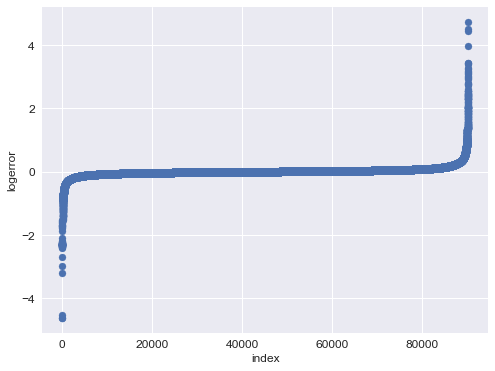

In [4]:
_ = plt.figure(figsize=(8,6))
_ = plt.scatter(range(df_train.shape[0]), np.sort(df_train['logerror'].values))
_ = plt.xlabel('index', fontsize=12)
_ = plt.ylabel('logerror', fontsize=12)
plt.show()

Log-error values are within [-5, 5] range. Outliers shows similar pattern on both ends.
Let's further investigate how the log-error is distributed.

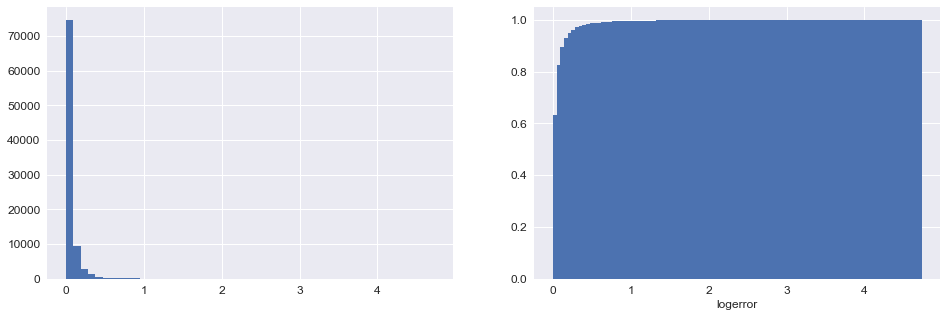

In [5]:
f, ax = plt.subplots(1, 2, figsize=(16,5))
_ = ax[0].hist(np.abs(df_train['logerror'].values), bins=50)
_ = ax[1].hist(np.abs(df_train['logerror'].values), bins=100, normed=True, cumulative=True)
_ = plt.xlabel('logerror', fontsize=12)
plt.show()

From two histograms, we can see that more than 90% of the log-error values are within [-1,1] range.

### Transaction Date

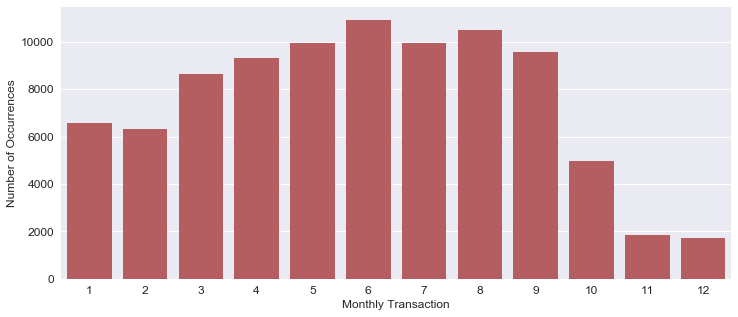

In [6]:
month_count = df_train['transactiondate'].dt.month
month_count = month_count.value_counts()
_ = plt.figure(figsize=(12,5))
_ = sns.barplot(month_count.index, month_count.values, color=color[2])
_ = plt.xlabel('Monthly Transaction', fontsize=12)
_ = plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

The data includes all transaction before October 15, 2016.

### Null Values

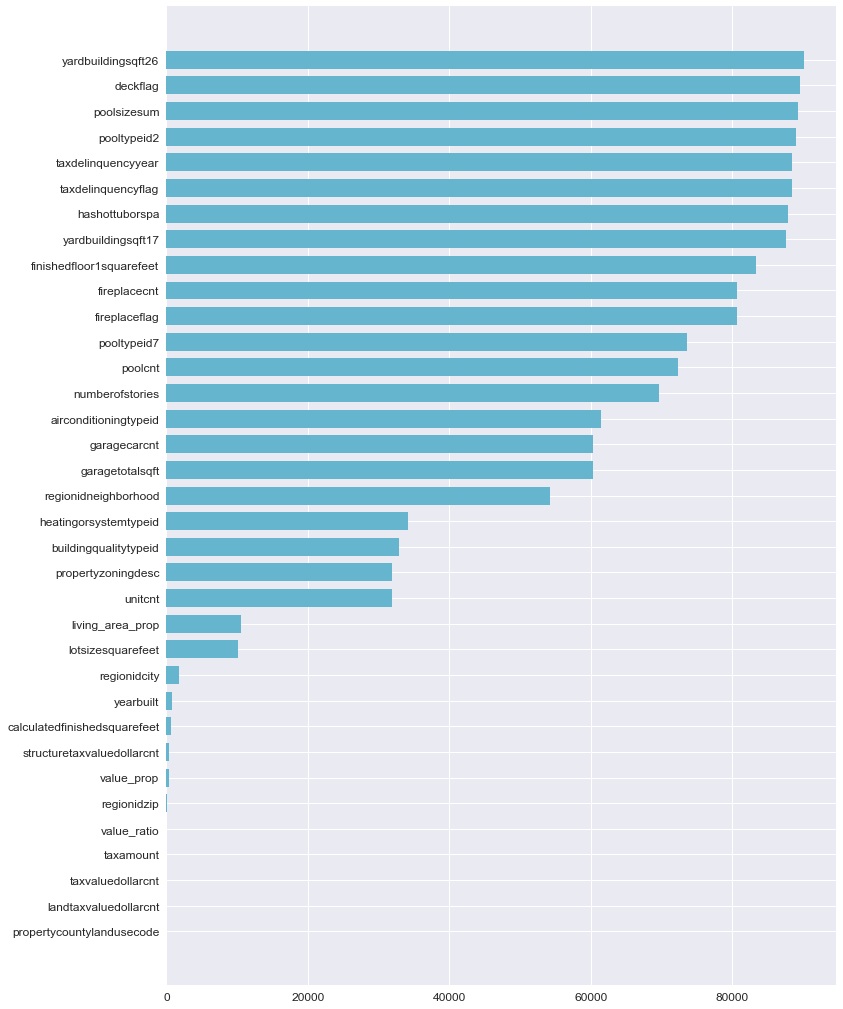

In [7]:
missing = df.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing count']
missing = missing.loc[missing['missing count'] > 0].sort_values(by='missing count')

ind = np.arange(missing.shape[0])
plt.figure(figsize=(12,18))
plt.barh(ind, missing['missing count'].values, tick_label=missing['column_name'], height=0.7, color=color[5])
plt.show()

### Location

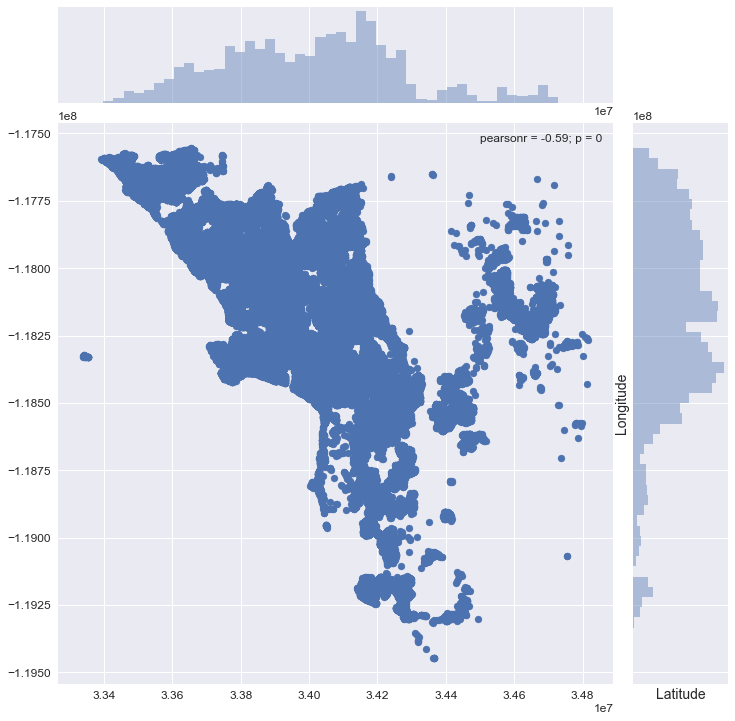

In [8]:
sns.jointplot(x=df['latitude'].values, y=df['longitude'].values, size=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()